In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [19]:
def plot_metrics(history):
  metrics = ['precison', 'recall', 'auc', 'prc']
  metrics_val = ['precison_validation', 'recall_validation', 'auc_validation', 'prc_validation']
  
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history['Epoch'], history[metric + '_train'], color=colors[0], label='Train')
    plt.plot(history['Epoch'], history[metric + '_validation'],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [8]:
result = pd.read_csv('train_val_precisons.csv')

In [9]:
result

,Fold,Epoch,precison_Train,precison_Validation,precison_train,precison_validation,recall_train,recall_validation,auc_train,auc_validation,prc_train,prc_validation
0,1.0,1.0,NaN,NaN,0.942419,0.848889,0.942419,0.848889,0.971152,0.850398,0.965785,0.818228
1,1.0,2.0,NaN,NaN,0.960649,0.848889,0.960649,0.848889,0.975375,0.937928,0.968790,0.924734
2,1.0,3.0,NaN,NaN,0.962205,0.948444,0.962205,0.948444,0.978596,0.948579,0.972997,0.934357
3,1.0,4.0,NaN,NaN,0.963095,0.968000,0.963095,0.968000,0.977173,0.981690,0.970958,0.976767
4,1.0,5.0,NaN,NaN,0.966207,0.960000,0.966207,0.960000,0.982344,0.968563,0.977750,0.960127
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,16.0,NaN,NaN,0.981996,0.960854,0.981996,0.960854,0.994611,0.991110,0.993217,0.989508
96,5.0,17.0,NaN,NaN,0.980885,0.965302,0.980885,0.965302,0.993520,0.987690,0.991778,0.984509
97,5.0,18.0,NaN,NaN,0.982885,0.969751,0.982885,0.969751,0.994028,0.990758,0.992360,0.988439
98,5.0,19.0,NaN,NaN,0.986219,0.963523,0.986219,0.963523,0.994167,0.968698,0.992501,0.959745


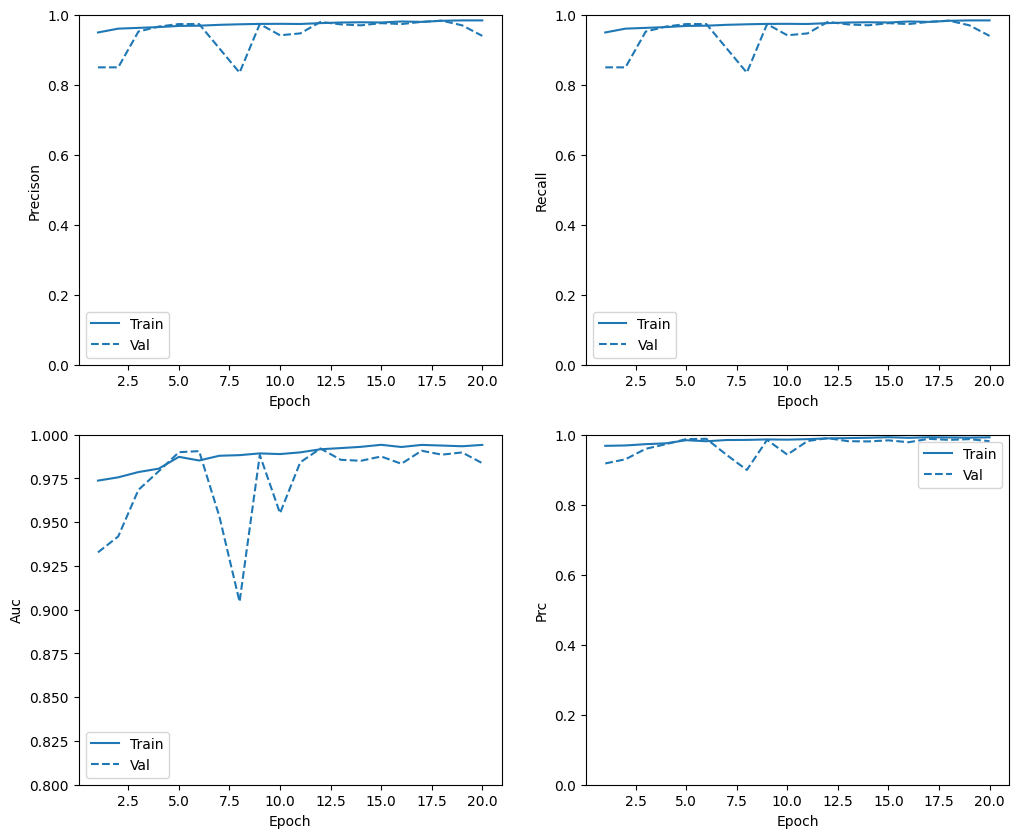

In [26]:
df_fold = result.where(result['Fold'] == 4)
plot_metrics(df_fold)